# Identify Customer Churn: Telecom with PyCaret

In this notebook we look at data from a Telecom company and build a model to predict customer churn using PyCaret method to perform preprocessing.

### Import libraries and set constant variables

In [1]:
import pandas as pd
import numpy as np
import pycaret as pc
import seaborn as sns


from datetime import date
import warnings
warnings.filterwarnings("ignore")

# Pycaret
from pycaret.classification import *

# Plots
#from plotly.offline import iplot
#import plotly.graph_objects as go
#from plotly.subplots import make_subplots


from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import *
from sklearn.metrics import f1_score, classification_report, confusion_matrix

RANDOM_SEED = 142
K_FOLDS = 5

## Import and review the data noting the following:
* There are 100,000 unique customer records
* There are 100 different features (columns)
* There are no duplicates but there are some empty values
* There is a mixture of categorical and numerical data
* The number of customers that have left (churned) are almost equal to those who have not
* The 'churn' column was collected during a 30 day period

In [2]:
# Import data:  Telecom_customer_churn
df = pd.read_csv("Telecom_customer_churn.csv")
feature_descriptions = pd.read_csv("Telecom_customer_churn_variable_list.txt")

In [3]:
# Glance at data
df.head()

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,change_rev,drop_vce_Mean,drop_dat_Mean,blck_vce_Mean,blck_dat_Mean,unan_vce_Mean,unan_dat_Mean,plcd_vce_Mean,plcd_dat_Mean,recv_vce_Mean,recv_sms_Mean,comp_vce_Mean,comp_dat_Mean,custcare_Mean,ccrndmou_Mean,cc_mou_Mean,inonemin_Mean,threeway_Mean,mou_cvce_Mean,mou_cdat_Mean,mou_rvce_Mean,owylis_vce_Mean,mouowylisv_Mean,iwylis_vce_Mean,mouiwylisv_Mean,peak_vce_Mean,peak_dat_Mean,mou_peav_Mean,mou_pead_Mean,opk_vce_Mean,opk_dat_Mean,mou_opkv_Mean,mou_opkd_Mean,drop_blk_Mean,attempt_Mean,complete_Mean,callfwdv_Mean,callwait_Mean,churn,months,uniqsubs,actvsubs,new_cell,crclscod,asl_flag,totcalls,totmou,totrev,adjrev,adjmou,adjqty,avgrev,avgmou,avgqty,avg3mou,avg3qty,avg3rev,avg6mou,avg6qty,avg6rev,prizm_social_one,area,dualband,refurb_new,hnd_price,phones,models,hnd_webcap,truck,rv,ownrent,lor,dwlltype,marital,adults,infobase,income,numbcars,HHstatin,dwllsize,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,Customer_ID
0,23.9975,219.25,22.500,0.2475,0.00,0.0,0.0,0.0,0.0,-157.25,-18.9975,0.666667,0.0,0.666667,0.0,6.333333,0.0,52.333333,0.0,42.333333,0.0,45.000000,0.0,0.000000,0.000000,0.000000,18.000000,0.000000,90.643333,0.0,97.176667,0.000000,0.000000,0.000000,0.000000,58.000000,0.0,132.600000,0.0,24.000000,0.0,55.220000,0.0,1.333333,52.333333,45.000000,0.0,0.333333,1,61,2,1,U,A,N,1652,4228.00000,1504.62,1453.44,4085.00,1602,29.66,83.37,32.69,272,116,30,322.0,136.0,38.0,S,NORTHWEST/ROCKY MOUNTAIN AREA,Y,N,149.98999,2.0,2.0,WCMB,0.0,0.0,O,15.0,S,S,1.0,M,4.0,3.0,C,A,0.0,N,U,U,U,U,U,Y,361.0,1000001
1,57.4925,482.75,37.425,0.2475,22.75,9.1,9.1,0.0,0.0,532.25,50.9875,8.333333,0.0,1.000000,0.0,61.333333,0.0,263.333333,0.0,69.000000,0.0,193.333333,0.0,1.666667,6.333333,5.463333,53.000000,0.333333,189.396667,0.0,55.280000,46.333333,24.216667,6.333333,3.696667,83.666667,0.0,75.333333,0.0,157.000000,0.0,169.343333,0.0,9.333333,263.333333,193.333333,0.0,5.666667,0,56,1,1,N,EA,N,14654,26400.00000,2851.68,2833.88,26367.00,14624,51.53,479.40,265.89,305,158,40,477.0,275.0,48.0,U,CHICAGO AREA,N,N,NaN,7.0,6.0,WC,1.0,1.0,NaN,1.0,S,S,1.0,M,5.0,1.0,C,A,0.0,Z,U,U,U,U,U,Y,240.0,1000002
2,16.9900,10.25,16.990,0.0000,0.00,0.0,0.0,0.0,0.0,-4.25,0.0000,0.333333,0.0,0.000000,0.0,2.666667,0.0,9.000000,0.0,0.333333,0.0,6.000000,0.0,0.000000,0.000000,0.000000,0.333333,0.000000,5.426667,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.0,5.193333,0.0,1.000000,0.0,0.233333,0.0,0.333333,9.000000,6.000000,0.0,0.000000,1,58,1,1,Y,C,N,7903,24385.05333,2155.91,1934.47,24303.05,7888,34.54,433.98,140.86,12,7,17,11.0,6.0,17.0,S,GREAT LAKES AREA,N,N,29.98999,2.0,1.0,NaN,0.0,0.0,O,7.0,S,M,2.0,M,5.0,2.0,C,A,0.0,N,U,Y,U,U,U,Y,1504.0,1000003
3,38.0000,7.50,38.000,0.0000,0.00,0.0,0.0,0.0,0.0,-1.50,0.0000,0.000000,0.0,0.000000,0.0,0.000000,0.0,3.666667,0.0,1.333333,0.0,3.666667,0.0,0.000000,0.000000,0.000000,1.333333,0.000000,8.410000,0.0,0.413333,0.333333,0.256667,0.000000,0.000000,1.333333,0.0,3.380000,0.0,3.666667,0.0,5.450000,0.0,0.000000,3.666667,3.666667,0.0,0.000000,0,60,1,1,Y,B,N,1502,3065.00000,2000.90,1941.81,3035.00,1479,40.45,63.23,30.81,8,3,38,50.0,25.0,40.0,T,CHICAGO AREA,N,N,29.98999,1.0,1.0,NaN,0.0,0.0,NaN,6.0,M,M,4.0,M,6.0,1.0,C,D,0.0,U,Y,U,U,U,U,Y,1812.0,1000004
4,55.2300,570.50,71.980,0.0000,0.00,0.0,0.0,0.0,0.0,38.50,0.0000,9.666667,0.0,0.666667,0.0,77.000000,0.0,222.333333,0.0,94.666667,0.0,137.000000,0.0,8.666667,15.000000,11.076667,66.000000,0.000000,285.233333,0.0,106.330000,14.666667,10.816667,0.666667,0.366667,97.333333,0.0,173.476667,0.0,90.333333,0.0,218.086667,0.0,10.333333,222.333333,137.000000,0.0,0.000000,0,57,1,1,Y,A,N,4485,14028.00000,2181.12,2166.48,13965.00,4452,38.69,249.38,79.50,558,191,55,586.0,196.0,80.0,U,NEW ENGLAND AREA,Y,N,149.98999,6.0,4.0,WCMB,0.0,0.0,R,5.0,M,S,1.0,M,6.0,1.0,C,O,0.0,I,U,U,U,U,U,Y,434.0,1000005


In [4]:
feature_descriptions

,1 rev_Mean Mean monthly revenue (charge amount)
0,2 mou_Mean Mean number of monthly minutes of use
1,3 totmrc_Mean Mean total monthly recurring charge
2,4 da_Mean Mean number of directory assisted calls
3,5 ovrmou_Mean Mean overage minutes of use
4,6 ovrrev_Mean Mean overage revenue
5,7 vceovr_Mean Mean revenue of voice overage
6,8 datovr_Mean Mean revenue of data overage
7,9 roam_Mean Mean number of roaming calls
8,10 change_mou Percentage change in monthly min...
9,11 change_rev Percentage change in monthly rev...


In [5]:
# View data details
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 100 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   rev_Mean          99643 non-null   float64
 1   mou_Mean          99643 non-null   float64
 2   totmrc_Mean       99643 non-null   float64
 3   da_Mean           99643 non-null   float64
 4   ovrmou_Mean       99643 non-null   float64
 5   ovrrev_Mean       99643 non-null   float64
 6   vceovr_Mean       99643 non-null   float64
 7   datovr_Mean       99643 non-null   float64
 8   roam_Mean         99643 non-null   float64
 9   change_mou        99109 non-null   float64
 10  change_rev        99109 non-null   float64
 11  drop_vce_Mean     100000 non-null  float64
 12  drop_dat_Mean     100000 non-null  float64
 13  blck_vce_Mean     100000 non-null  float64
 14  blck_dat_Mean     100000 non-null  float64
 15  unan_vce_Mean     100000 non-null  float64
 16  unan_dat_Mean     10

#### We've identified the Target as the column labeled 'churn'.  It identifies a customer that has left as 'Y'.

In [6]:
# Check taget cardinality and balance
df['churn'].value_counts()

0    50438
1    49562
Name: churn, dtype: int64

In [44]:
avg_mon_rev = df['avg6rev'].sum()/6
print(avg_mon_rev)

950293.1666666666


### Split a hold-out test set of 10% of data to test the model avoiding data leakage.

In [7]:
# create method to 'hold' set for testing
def data_sampling(dataset, frac: float, random_seed: int):
    data_sampled_a = dataset.sample(frac=frac, random_state=random_seed)
    data_sampled_b =  dataset.drop(data_sampled_a.index).reset_index(drop=True)
    data_sampled_a.reset_index(drop=True, inplace=True)
    return data_sampled_a, data_sampled_b 

In [8]:
# Set the hold set at 10%
data, data_unseen = data_sampling(df, 0.9, RANDOM_SEED)
print(f"There are {data_unseen.shape[0]} samples for Unseen Data.")

There are 10000 samples for Unseen Data.


## Preprocess using PyCaret's 'setup' method in preparation for our model.
</n></n>
### Note, the following steps are completed with this method:
* Address missing values using selected imputation techniques:
    ** Numeric = Mean
    ** Categorical = replace with "Not Available"
* Check for class imbalance and address using SMOTE resampling
* Avoid bias with K-fold split of 10
* Encode using yeo-johnson power transformer (improved symmetry)
* normalize data using z-score
* Remove outliers outside of the 95% cofidence interval
* Remove collinear features above >90% correlation with each other
* Reduce dimensionality using PCA threshold set to 99%
* Select top 80% of features based on importance

In [9]:
exp01 = setup(data=data, target="churn", session_id=RANDOM_SEED, ignore_features=["Customer_ID"], 
                numeric_features=["months"], normalize=True,
                feature_selection=True, remove_outliers=True,
                remove_multicollinearity=True, fix_imbalance=True,
                transformation=True, ignore_low_variance=True, pca=True, 
                bin_numeric_features=["months"],
                silent=True, experiment_name="customer-churn-prediction",
                log_experiment=True)

,Description,Value
0,session_id,142
1,Target,churn
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(90000, 100)"
5,Missing Values,True
6,Numeric Features,68
7,Categorical Features,30
8,Ordinal Features,False
9,High Cardinality Features,False


2021/11/16 21:20:42 WARNING mlflow.tracking.context.git_context: Failed to import Git (the Git executable is probably not on your PATH), so Git SHA is not available. Error: Failed to initialize: Cmd('git') failed due to: exit code(1)
  cmdline: git version
  stderr: 'xcrun: error: invalid active developer path (/Library/Developer/CommandLineTools), missing xcrun at: /Library/Developer/CommandLineTools/usr/bin/xcrun'


### Below we compare all the models and sort by F1 score - useful for churn models looking at precision and recall.

In [11]:
# using PyCaret's 'compare_models' method the models are tested with 5 K-folds
top_model = compare_models(fold=K_FOLDS,
                            sort="F1",
                            n_select=1)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.6132,0.6570,0.6488,0.6034,0.6253,0.2266,0.2272,37.9040
ridge,Ridge Classifier,0.6131,0.0000,0.6488,0.6033,0.6252,0.2265,0.2272,37.3980
qda,Quadratic Discriminant Analysis,0.5944,0.6342,0.6787,0.5787,0.6247,0.1894,0.1923,37.0360
lr,Logistic Regression,0.6133,0.6571,0.6459,0.6041,0.6243,0.2269,0.2275,40.0880
catboost,CatBoost Classifier,0.6141,0.6606,0.6417,0.6058,0.6232,0.2284,0.2288,49.5300
lightgbm,Light Gradient Boosting Machine,0.6088,0.6530,0.6450,0.5992,0.6213,0.2180,0.2186,38.0720
gbc,Gradient Boosting Classifier,0.6045,0.6489,0.6515,0.5933,0.6210,0.2095,0.2105,83.8320
svm,SVM - Linear Kernel,0.6045,0.0000,0.6471,0.5939,0.6188,0.2093,0.2106,36.6920
nb,Naive Bayes,0.5807,0.6156,0.6599,0.5675,0.6102,0.1620,0.1642,35.4460
ada,Ada Boost Classifier,0.5960,0.6339,0.6153,0.5900,0.6024,0.1921,0.1923,45.5200


### Tune the selected 'best_model' by adjusting the hyperparameters of the model

In [21]:
# using PyCaret's 'tune_model' the top model selected from the previous comparison is now tuned
tuned_model = tune_model(estimator=top_model, fold=K_FOLDS,
                         optimize="F1", choose_better=True,
                         verbose=False)

In [22]:
# View the tuned model hyperparameters
plot_model(tuned_model, plot="parameter")

,Parameters
n_components,None
priors,None
shrinkage,0.005
solver,lsqr
store_covariance,False
tol,0.0001


In [23]:
model = create_model(tuned_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6140,0.6570,0.6421,0.6055,0.6233,0.2283,0.2287
1,0.6192,0.6639,0.6533,0.6093,0.6306,0.2387,0.2393
2,0.6112,0.6544,0.6527,0.6004,0.6255,0.2227,0.2236
3,0.6249,0.6722,0.6567,0.6152,0.6353,0.2500,0.2506
4,0.6063,0.6534,0.6365,0.5980,0.6167,0.2129,0.2134
5,0.6074,0.6499,0.6486,0.5969,0.6217,0.2150,0.2158
6,0.6135,0.6608,0.6443,0.6047,0.6238,0.2273,0.2278
7,0.6159,0.6526,0.6486,0.6065,0.6268,0.2320,0.2326
8,0.6122,0.6518,0.6423,0.6035,0.6223,0.2246,0.2251
9,0.6181,0.6595,0.6717,0.6045,0.6363,0.2367,0.2382


In [24]:
tuned_model = tune_model(estimator=model, fold=K_FOLDS,
                         optimize="F1", choose_better=True,
                         verbose=False)

In [25]:
bagged_model = ensemble_model(model, fold=K_FOLDS)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6149,0.6598,0.6400,0.6070,0.6231,0.2299,0.2303
1,0.6165,0.6622,0.6512,0.6067,0.6282,0.2334,0.2340
2,0.6060,0.6520,0.6414,0.5967,0.6183,0.2123,0.2129
3,0.6143,0.6559,0.6433,0.6057,0.6239,0.2288,0.2292
4,0.6116,0.6542,0.6521,0.6009,0.6255,0.2235,0.2243
Mean,0.6127,0.6568,0.6456,0.6034,0.6238,0.2256,0.2261
SD,0.0037,0.0037,0.0050,0.0040,0.0033,0.0074,0.0073


In [28]:
best_model = bagged_model
plot_model(best_model, plot="parameter")
print(f"Model: {type(best_model)}")

,Parameters
base_estimator,"LinearDiscriminantAnalysis(n_components=None, ..."
bootstrap,True
bootstrap_features,False
max_features,1.0
max_samples,1.0
n_estimators,10
n_jobs,None
oob_score,False
random_state,142
verbose,0


Model: <class 'sklearn.ensemble._bagging.BaggingClassifier'>


### Plot model measurements

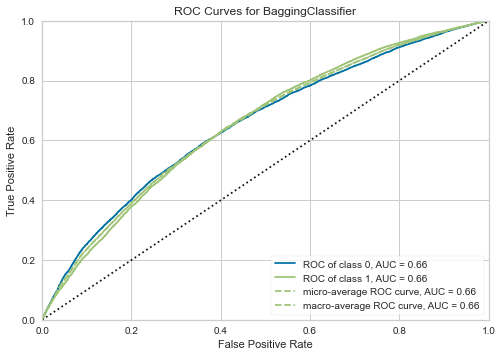

In [29]:
plot_model(best_model, plot="auc")

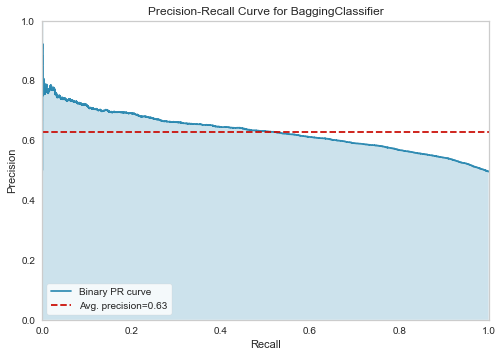

In [30]:
plot_model(best_model, plot="pr")

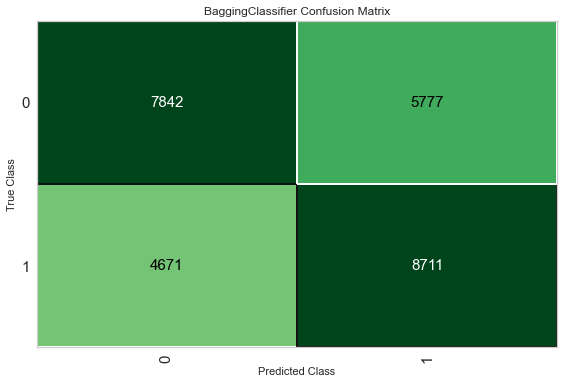

In [31]:

plot_model(best_model, plot="confusion_matrix")

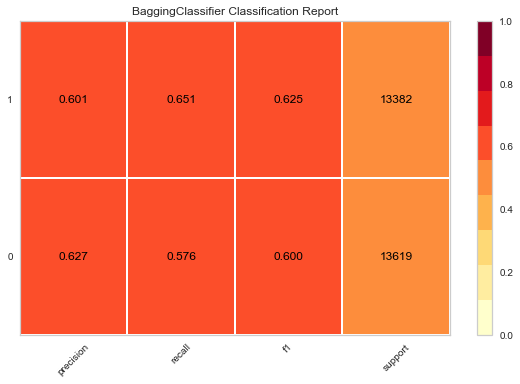

In [32]:

plot_model(best_model, plot="class_report")

In [33]:
predict_model(best_model);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Linear Discriminant Analysis,0.6131,0.6551,0.6509,0.6013,0.6251,0.2266,0.2274


## Test model against the hold-out set

In [34]:
final_model = finalize_model(best_model)

In [35]:
def test_score_report(data_unseen, predict_unseen):
    le = LabelEncoder()
    data_unseen["Label"] = le.fit_transform(data_unseen.churn.values)
    data_unseen["Label"] = data_unseen["Label"].astype(int)
    accuracy = accuracy_score(data_unseen["Label"], predict_unseen["Label"])
    roc_auc = roc_auc_score(data_unseen["Label"], predict_unseen["Label"])
    precision = precision_score(data_unseen["Label"], predict_unseen["Label"])
    recall = recall_score(data_unseen["Label"], predict_unseen["Label"])
    f1 = f1_score(data_unseen["Label"], predict_unseen["Label"])

    df_unseen = pd.DataFrame({
        "Accuracy" : [accuracy],
        "AUC" : [roc_auc],
        "Recall" : [recall],
        "Precision" : [precision],
        "F1 Score" : [f1]
    })
    return df_unseen

In [39]:
predict_unseen = predict_model(final_model, data=data_unseen);
score_unseen = test_score_report(data_unseen, predict_unseen)
print(score_unseen.to_string(index=False))

 Accuracy      AUC   Recall  Precision  F1 Score
   0.6079 0.608106 0.638341   0.598678  0.617874


In [50]:
print("Potential recapture: $",avg_mon_rev*.68)
print("Average monthly revenue sum: $",avg_mon_rev)

Potential recapture: $ 646199.3533333334
Average monthly revenue sum: $ 950293.1666666666


### Consclusion

The Linear Discriminant Model provides the best performance, predicting 64% of positive churn correctly.  By identifying and addressing these customers there is potential to recapture over 1/2 million in churn.